In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getImportantCounts(df):
    print(df.article_source.value_counts())
    print(df.relevant.value_counts())

In [3]:
EBfb = pd.read_json('./english/biased/fb.json')
EBfbabe = pd.read_json('./english/biased/foodbabe.json')
EBfr = pd.read_json('./english/biased/foodrevolution.json')
EBoa = pd.read_json('./english/biased/organicauthority.json')
EBoc = pd.read_json('./english/biased/organicconsumers.json')

In [4]:
EB = pd.concat([EBfb,EBfbabe,EBfr,EBoa,EBoc],sort=False,ignore_index=True)
EB['biased'] = True

In [5]:
EB.head()

,article_author,article_id,article_link,article_rating,article_source,article_text,article_time,article_title,article_url,comments,relevant,resource_type,search_query,biased
0,[],1.334188e+27,https://medium.com/@johnroulac/oxford-study-at...,NaN,fb,Supposed climate independent food research gro...,2017-11-04 13:42:45,,https://www.facebook.com/organicconsumers/post...,"[{'comment_time': '2017-11-05 00:13:58', 'comm...",1,blog,organic consumers,True
1,[],1.334188e+27,https://www.facebook.com/EcoWatch/videos/13596...,1.0,fb,Community Gardens are spreading across the USA...,2017-11-05 22:33:27,,https://www.facebook.com/organicconsumers/post...,[],0,blog,organic consumers,True
2,[],1.334188e+27,https://www.ecowatch.com/water-lead-detection-...,188.0,fb,An 11-year-old girl was given a top award afte...,2017-11-05 00:30:22,,https://www.facebook.com/organicconsumers/post...,[{'comment_text': 'Please lord produce more hu...,0,blog,organic consumers,True
3,[],1.334188e+27,https://www.ecowatch.com/regenerative-farming-...,153.0,fb,A form of what is now called regenerative agri...,2017-11-06 21:04:54,,https://www.facebook.com/organicconsumers/post...,"[{'comment_time': '2017-11-07 16:36:01', 'comm...",1,blog,organic consumers,True
4,[],1.334188e+27,http://inthesetimes.com/features/monsanto_epa_...,NaN,fb,Monsanto is America's master manipulator.,2017-11-05 14:26:30,,https://www.facebook.com/organicconsumers/post...,"[{'comment_text': 'And sadly, this isn't unusu...",0,blog,organic consumers,True


In [6]:
getImportantCounts(EB)

fb                  5035
Foodrevolution        78
Organicauthority      66
organicconsumers      64
Food Babe             15
Name: article_source, dtype: int64
0    3646
1    1612
Name: relevant, dtype: int64


In [7]:
def source_distribution(df):
    # entity distribution
    counts = df.article_source.value_counts()
    total = np.sum(counts)
    ratios = counts/total

    labels = [x+' '+"{:.4f}".format(y*100) for x,y in zip(counts.index.tolist(), ratios.get_values())]
    sizes = ratios.get_values()
    patches, texts,_ = plt.pie(sizes, shadow=True, startangle=90, autopct='%1.1f%%')
    plt.legend(patches, labels, loc='best')
    plt.axis('equal')
    plt.tight_layout()
    plt.title('Source Distribution (Total: '+str(total)+' )')
    plt.show()

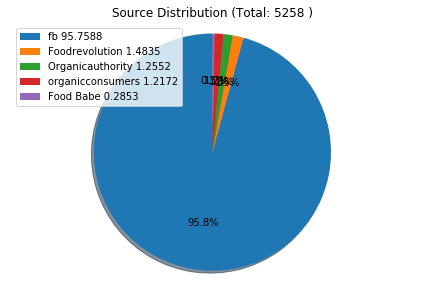

In [8]:
source_distribution(EB)

In [9]:
EUFcm = pd.read_json('./english/unbiased/Forum/cafemom.json')
EUFqu = pd.read_json('./english/unbiased/Forum/quora.json')
EUFdq = pd.read_json('./english/unbiased/Forum/disqus.json')
EUFrd = pd.read_json('./english/unbiased/Forum/reddit.json')
EUFmb = pd.read_json('./english/unbiased/Forum/usmessageboard.json')

In [10]:
EUF = pd.concat([EUFcm,EUFqu,EUFdq,EUFrd,EUFmb],sort=False,ignore_index=True)
EUF['biased'] = False

In [11]:
EUF.head()

,article_author,article_source,article_text,article_time,article_title,article_url,comments,relevant,resource_type,search_query,original_source,original_url,article_rating,article_subcategory,comments_count,biased
0,"[{'article_author_id': '369825', 'article_auth...",cafemom,"Hi, how many of you are into organic food? I r...",2017-11-28 12:36:00,Organic food,http://www.cafemom.com/group/121506/forums/rea...,"[{'comment_id': 'post349826036', 'comment_auth...",1,forum,organic food site:cafemom.com,NaN,NaN,NaN,NaN,NaN,False
1,"[{'article_author_id': '148861', 'article_auth...",cafemom,LONDON (Reuters) - Organic food has no nutriti...,2009-07-29 18:38:00,Organic food is no healthier,http://www.cafemom.com/group/99198/forums/read...,"[{'comment_id': 'post69424412', 'comment_autho...",1,forum,organic food site:cafemom.com,NaN,NaN,NaN,NaN,NaN,False
2,"[{'article_author_id': '312143', 'article_auth...",cafemom,As a new mom with a love of food I am offering...,2012-08-17 10:42:00,Num Nums Organic Food for Baby. Orlando Delive...,http://www.cafemom.com/group/117663/forums/rea...,"[{'comment_id': 'post200364798', 'comment_auth...",0,forum,organic food site:cafemom.com,NaN,NaN,NaN,NaN,NaN,False
3,"[{'article_author_id': '365540', 'article_auth...",cafemom,No Gluten Ingredients 1 Edited 2/21/08\nNO GLU...,2008-02-22 14:48:00,Gluten Free Foods @ Trader Joe's,http://www.cafemom.com/group/909/forums/read/2...,"[{'comment_id': 'post16999019', 'comment_autho...",0,forum,organic food site:cafemom.com,NaN,NaN,NaN,NaN,NaN,False
4,"[{'article_author_id': '552253', 'article_auth...",cafemom,Where do you shop and what do you think is the...,2009-07-03 16:27:00,the cheapest store to go grocery shopping? (ot...,http://www.cafemom.com/group/416/forums/read/9...,"[{'comment_id': 'post67815207', 'comment_autho...",1,forum,organic food site:cafemom.com,NaN,NaN,NaN,NaN,NaN,False


In [12]:
getImportantCounts(EUF)

Quora                     1703
www.usmessageboard.com     382
reddit                     256
cafemom                     88
Disqus                      42
Name: article_source, dtype: int64
1    1847
0     624
Name: relevant, dtype: int64


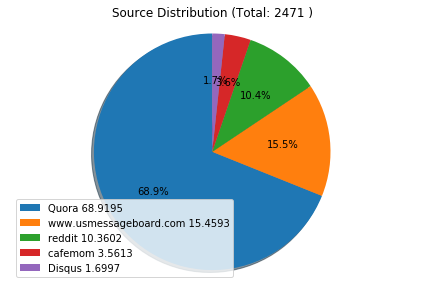

In [13]:
source_distribution(EUF)

In [14]:
EUNct = pd.read_json('./english/unbiased/newssites/chicagotribune.json')
EUNhp = pd.read_json('./english/unbiased/newssites/huffingtonpost.json')
EUNlt = pd.read_json('./english/unbiased/newssites/latimes.json')
EUNnp = pd.read_json('./english/unbiased/newssites/nypost.json')
EUNnt = pd.read_json('./english/unbiased/newssites/nytimes.json')
EUNwp = pd.read_json('./english/unbiased/newssites/washingtonpost.json')
EUNut = pd.read_json('./english/unbiased/newssites/usatoday.json')

In [15]:
EUN = pd.concat([EUNct,EUNhp,EUNlt,EUNnp,EUNnt,EUNwp,EUNut],sort=False,ignore_index=True)
EUN['biased'] = False

In [16]:
EUN.head()

,article_author,article_source,article_text,article_time,article_title,article_url,comments,relevant,resource_type,search_query,article_tags,comments_count,biased
0,"[{'article_author_id': '', 'article_author_nam...",Chicagotribune,Americans can't seem to get enough organic pou...,2017-11-28 11:16:00,Organic chicken boom spurs Whole Foods supplie...,http://www.chicagotribune.com/business/ct-biz-...,[],1,editorial,organic_agriculture,NaN,NaN,False
1,"[{'article_author_id': '', 'article_author_nam...",Chicagotribune,"On Tuesday, The Radler (2375 N. Milwaukee Ave....",2015-03-18 17:31:00,The Radler hosts pork-centric dinner for charity,http://www.chicagotribune.com/dining/chi-the-r...,[],0,editorial,organic_agriculture,NaN,NaN,False
2,"[{'article_author_id': '', 'article_author_nam...",Chicagotribune,Amazon\nhas proved its power to disrupt market...,2017-06-30 10:31:00,The big consequence of the Amazon-Whole Foods ...,http://www.chicagotribune.com/business/ct-amaz...,[],1,editorial,organic_agriculture,NaN,NaN,False
3,"[{'article_author_id': '', 'article_author_nam...",Chicagotribune,"""Climate change"" is out. ""Resilience"" is in. ""...",2017-05-25 20:46:00,What climate change? Agencies retool their mis...,http://www.chicagotribune.com/news/nationworld...,[{'comment_id': '9bcfde24483cac1610ccbf012f77e...,0,editorial,organic_agriculture,NaN,NaN,False
4,"[{'article_author_id': '', 'article_author_nam...",Chicagotribune,Strolling through a flock of free-roaming rust...,2017-11-21 10:36:00,Best-laid plans to give chickens room to run a...,http://www.chicagotribune.com/business/ct-biz-...,[],0,editorial,organic_agriculture,NaN,NaN,False


In [17]:
getImportantCounts(EUN)

Chicagotribune         2328
The Washington Post    1563
latimes                1522
Huffingtonpost          880
NY Times                438
NY Post                 106
USA Today                95
Name: article_source, dtype: int64
0    4504
1    2428
Name: relevant, dtype: int64


In [18]:
print(EB.shape)
print(EUF.shape)
print(EUN.shape)

(5258, 14)
(2471, 16)
(6932, 13)


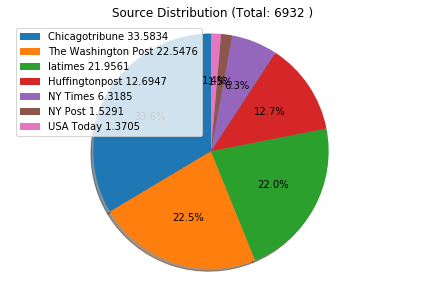

In [19]:
source_distribution(EUN)

In [20]:
english = pd.concat([EB,EUF,EUN],sort=False,ignore_index=True)

In [21]:
english.head()

,article_author,article_id,article_link,article_rating,article_source,article_text,article_time,article_title,article_url,comments,relevant,resource_type,search_query,biased,original_source,original_url,article_subcategory,comments_count,article_tags
0,[],1.334188e+27,https://medium.com/@johnroulac/oxford-study-at...,NaN,fb,Supposed climate independent food research gro...,2017-11-04 13:42:45,,https://www.facebook.com/organicconsumers/post...,"[{'comment_time': '2017-11-05 00:13:58', 'comm...",1,blog,organic consumers,True,NaN,NaN,NaN,NaN,NaN
1,[],1.334188e+27,https://www.facebook.com/EcoWatch/videos/13596...,1.0,fb,Community Gardens are spreading across the USA...,2017-11-05 22:33:27,,https://www.facebook.com/organicconsumers/post...,[],0,blog,organic consumers,True,NaN,NaN,NaN,NaN,NaN
2,[],1.334188e+27,https://www.ecowatch.com/water-lead-detection-...,188.0,fb,An 11-year-old girl was given a top award afte...,2017-11-05 00:30:22,,https://www.facebook.com/organicconsumers/post...,[{'comment_text': 'Please lord produce more hu...,0,blog,organic consumers,True,NaN,NaN,NaN,NaN,NaN
3,[],1.334188e+27,https://www.ecowatch.com/regenerative-farming-...,153.0,fb,A form of what is now called regenerative agri...,2017-11-06 21:04:54,,https://www.facebook.com/organicconsumers/post...,"[{'comment_time': '2017-11-07 16:36:01', 'comm...",1,blog,organic consumers,True,NaN,NaN,NaN,NaN,NaN
4,[],1.334188e+27,http://inthesetimes.com/features/monsanto_epa_...,NaN,fb,Monsanto is America's master manipulator.,2017-11-05 14:26:30,,https://www.facebook.com/organicconsumers/post...,"[{'comment_text': 'And sadly, this isn't unusu...",0,blog,organic consumers,True,NaN,NaN,NaN,NaN,NaN


In [22]:
getImportantCounts(english)

fb                        5035
Chicagotribune            2328
Quora                     1703
The Washington Post       1563
latimes                   1522
Huffingtonpost             880
NY Times                   438
www.usmessageboard.com     382
reddit                     256
NY Post                    106
USA Today                   95
cafemom                     88
Foodrevolution              78
Organicauthority            66
organicconsumers            64
Disqus                      42
Food Babe                   15
Name: article_source, dtype: int64
0    8774
1    5887
Name: relevant, dtype: int64


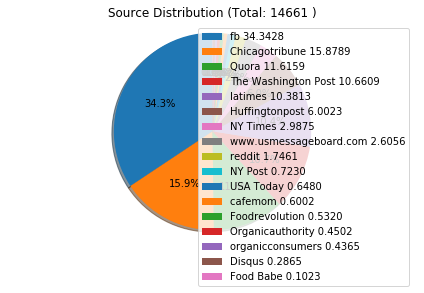

In [23]:
source_distribution(english)

In [24]:
def domain_relevance_distribution(df):
    # domain relevance
    domain_relevant_sentence_count = df.relevant.value_counts()[1] if 1 in df.relevant.value_counts() else 0
    domain_irrelevant_sentence_count = df.relevant.value_counts()[0] if 0 in df.relevant.value_counts() else 0
    total_sentence_count = domain_relevant_sentence_count + domain_irrelevant_sentence_count
    domain_relevant_ratio = domain_relevant_sentence_count/total_sentence_count
    domain_irrelevant_ratio = domain_irrelevant_sentence_count/total_sentence_count
    labels = ['Domain-Relevant', 'Domain-Irrelevant']
    sizes = [domain_relevant_ratio, domain_irrelevant_ratio]
    colors = ['yellowgreen', 'gold']
    patches, texts, _ = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.title('Relevance Distribution')
    plt.show()

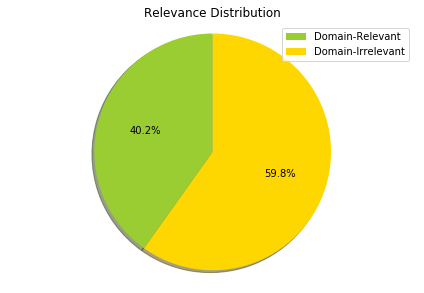

In [25]:
domain_relevance_distribution(english)

In [26]:
englishR = english[english['relevant'] == 1]
englishR = englishR[englishR['comments'].apply(lambda x:len(x)) > 0]

In [27]:
englishR.tail()

,article_author,article_id,article_link,article_rating,article_source,article_text,article_time,article_title,article_url,comments,relevant,resource_type,search_query,biased,original_source,original_url,article_subcategory,comments_count,article_tags
14607,[{'article_author_name': 'Deirdre Shesgreen'}],NaN,NaN,NaN,USA Today,WASHINGTON — If University of Cincinnati toxic...,2017-09-19 21:40:52,EPA nominee Michael Dourson endorsed weak stan...,https://www.usatoday.com/story/news/politics/2...,[{'comment_id': '1421588331287596_142166216128...,1,editorial,organic,False,NaN,NaN,NaN,NaN,NaN
14613,[{'article_author_name': 'Jeremy Bowman'}],NaN,NaN,NaN,USA Today,The organic grocery chain fell on a weak earni...,2017-06-15 19:45:55,Why Whole Foods Market stock is getting slammed,https://www.usatoday.com/story/money/2017/06/1...,[{'comment_id': '1067987119970168_106816050328...,1,editorial,organic,False,NaN,NaN,NaN,NaN,NaN
14616,[{'article_author_name': 'Alex Berezow'}],NaN,NaN,NaN,USA Today,"We'll all be smarter, healthier and savvier if...",2017-07-21 11:00:10,Call junk science by its rightful name: Fake news,https://www.usatoday.com/story/opinion/2017/07...,[{'comment_id': '1342226019208324_134585664217...,1,editorial,organic,False,NaN,NaN,NaN,NaN,NaN
14617,[{'article_author_name': 'Josh Hafner'}],NaN,NaN,NaN,USA Today,It's an unconscious act for many: Before you e...,2017-03-09 18:47:16,Is washing your produce a waste of time?,https://www.usatoday.com/story/news/nation-now...,[{'comment_id': '1351221804939929_156775662661...,1,editorial,organic,False,NaN,NaN,NaN,NaN,NaN
14622,[{'article_author_name': 'Scott Goss'}],NaN,NaN,NaN,USA Today,Envirokure only recently began selling its org...,2016-05-10 19:29:20,Startup to turn chicken poop into organic gold,https://www.usatoday.com/story/tech/nation-now...,[{'comment_id': '1098328323557518_109902406015...,1,editorial,organic,False,NaN,NaN,NaN,NaN,NaN


In [28]:
def domain_bias_distribution(df):
    # domain relevance
    biased_sentence_count = df.biased.value_counts()[True] if True in df.biased.value_counts() else 0
    unbiased_sentence_count = df.biased.value_counts()[False] if False in df.biased.value_counts() else 0
    total_sentence_count = biased_sentence_count + unbiased_sentence_count
    domain_biased_ratio = biased_sentence_count/total_sentence_count
    domain_unbiased_ratio = unbiased_sentence_count/total_sentence_count
    labels = ['Biased', 'Unbiased']
    sizes = [domain_biased_ratio, domain_unbiased_ratio]
    colors = ['yellowgreen', 'gold']
    patches, texts, _ = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.title('Bias Distribution')
    plt.show()

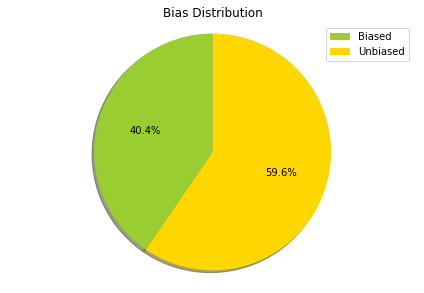

In [29]:
domain_bias_distribution(englishR)

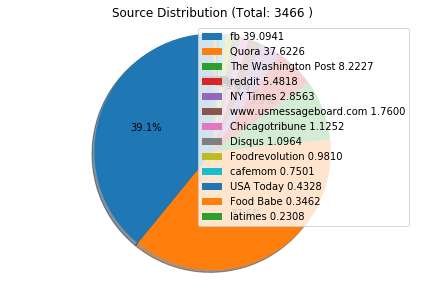

In [30]:
source_distribution(englishR)

## Store Combined CSV to disc

In [ ]:
englishR.to_csv('completeRelevantEnglish.csv', sep='|', encoding='utf-8',index=False)